<h1>Linear Regression on King's County Housing Data</h1>
<p>Here, I will show you how to predict house prices based on multiple features using linear regression. I will be building <b>normal equation from scratch</b>. Let's begin</p>

<h3>Libraries used</h3>
<ul>
    <li>NumPy, for effective list manipulation</li>
    <li>Pandas, for reading the dataset</li>
    <li>Matplotlib, for data visualization</li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Fetching the dataset</h2>
<p>We will be using the King's Country Housing dataset obtained from Kaggle. Using the pd.read_csv() function, we read the data from the dataset, separate the header labels and feature data from it and store it in different variables.</p>

In [2]:
dataset = pd.read_csv('kc_house_data.csv')
print(dataset.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

<h3>Choosing the features and the labels to be predicted</h3>
<p>The features that we'll use to predict the prices (labels) are :</p>
<ol>
    <li>No. of bedrooms</li>
    <li>Sq.ft. living</li>
    <li>No. of floors</li>
</ol>
<p>We will visualize a scatter plot between sq.ft.living area and the price of the house repectively</p>

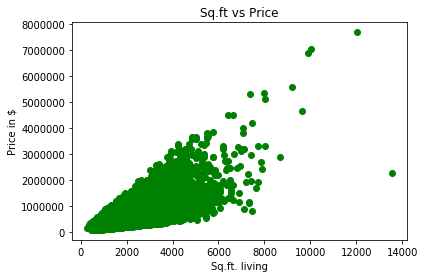

In [3]:
features = dataset.loc[:, ['bedrooms','sqft_living','floors']].values
labels = dataset['price'].values

plt.scatter(features[:,1], labels, color="green")
plt.xlabel('Sq.ft. living')
plt.ylabel('Price in $')
plt.title('Sq.ft vs Price')
plt.show()

<h3>Adding 1's to the feature matrix</h3>
<p>We add ones to the feature index 0 for all training examples as this allows us to do matrix operations with theta and x. Hence, making the two vectors 'theta' and 'x(i)' match each other element-wise i.e have the same number of elements.</p>

In [4]:
features = np.column_stack((np.ones(len(labels)), features))
print(features[:10])
print(features.shape)

[[1.000e+00 3.000e+00 1.180e+03 1.000e+00]
 [1.000e+00 3.000e+00 2.570e+03 2.000e+00]
 [1.000e+00 2.000e+00 7.700e+02 1.000e+00]
 [1.000e+00 4.000e+00 1.960e+03 1.000e+00]
 [1.000e+00 3.000e+00 1.680e+03 1.000e+00]
 [1.000e+00 4.000e+00 5.420e+03 1.000e+00]
 [1.000e+00 3.000e+00 1.715e+03 2.000e+00]
 [1.000e+00 3.000e+00 1.060e+03 1.000e+00]
 [1.000e+00 3.000e+00 1.780e+03 1.000e+00]
 [1.000e+00 3.000e+00 1.890e+03 2.000e+00]]
(21613, 4)


<h3>Finding optimal parameters for our regression line</h3>
<p>Gradient descent gives us one way of minimizing the cost function. There's a second way of doing so, this time performing the minimization explicitly without resorting to an iterative algorithm.</p>
<p>In the <b>"Normal Equation"</b> method, we will minimize the cost function by explicitly taking the derivatives with respect to the theta and setting them to 0.</p>
<p>This allows us to find the optimum theta without iteration. The normal equation formula is given below</p>
<p>theta = (X<sup>T</sup>.X)<sup>-1</sup>.X<sup>T</sup>.y</p>
<p>There is no need to do <b>feature scaling</b> with the normal equation</p>
    <p>With the normal equation, computing the inverse has the time complexity O(n<sup>3</sup>). So if we have a very large number of features, the normal equation will be slow. In practice, when number of features exceeds 10,000 it might be a good time to go from normal equation to an iterative process like gradient descent.</p>

In [5]:
theta = np.dot(np.linalg.inv(np.dot(np.transpose(features), features)), np.dot(np.transpose(features), labels))
print(theta)

theta0, theta1 = theta[0], theta[2]

[ 75856.12494116 -56985.92483622    313.22728382   3239.7578125 ]


<h3>Visualizing our regression line after getting the optimal parameters</h3>
<p>We get the optimal paramters for which the cost function is zero. Now we choose the first (intercept) and the third (for sq.ft.living) parameter so as to visualize how well the regression line fits to our sq.ft.living v/s price data</p>

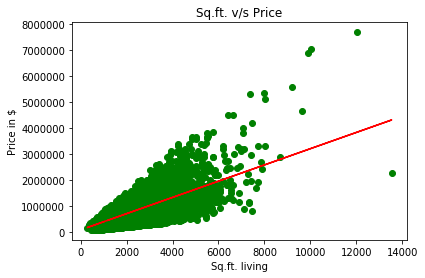

In [6]:
plt.scatter(features[:,2], labels, color="green")
plt.plot(features[:,2], theta0 + theta1 * features[:,2], color="red")
plt.xlabel('Sq.ft. living')
plt.ylabel('Price in $')
plt.title('Sq.ft. v/s Price')
plt.show()